In [ ]:
#Importando as bibliotecas
!pip install seaborn matplotlib scikit-learn
!pip install pickle5
import pandas as pd  #Para manipulação de dados em Python que facilita o trabalho com grandes conjuntos de dados estruturados.
import numpy as np  #Para computação numérica em Python que fornece suporte para arrays multidimensionais e várias funções matemáticas de alto desempenho.
import matplotlib.pyplot as plt   #Permite criar gráficos em 2D, como gráficos de linha, dispersão, barras e histogramas.
import seaborn as sns #Construída sobre o matplotlib, que facilita a criação de gráficos estatísticos mais sofisticados e visualmente agradáveis.
from sklearn.neural_network import MLPClassifier #Modelo de IA escolhida para treinamento e integração no projeto
from sklearn import metrics #biblioteca que ajuda a obter métricas no treinamento de modelos de IAs
from sklearn.metrics import classification_report, confusion_matrix #biblioteca que ajuda a obter métricas no treinamento de modelos de IAs
from sklearn.preprocessing import StandardScaler #biblioteca que é usada para fazer o escalonamento da base
from sklearn.model_selection import train_test_split # Importa a função train_test_split
import joblib #biblioteca usada para salvar um modelo de IA trenado
from pickle5 import pickle  #biblioteca usada para salvar um modelo de IA trenado

In [2]:
#Carregando a planilha de dados, pré-carregada no campo de arquivos do collab
Nasa_Training = pd.read_csv("/content/Dataset_Nasa_Training.csv")

In [3]:
#transformando uma tabela em um dataframe
dados = pd.DataFrame(Nasa_Training)

In [4]:
#Excluindo as colunas desnessárias para treinamento de IA
dados.drop(columns=['id','orbiting_body','sentry_object','name'], inplace=True)

In [5]:
#consultando a estrutura do dataframe
dados.head(100)

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,False
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,True
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,False
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20,False
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,True
...,...,...,...,...,...,...
95,0.007666,0.017141,26099.373999,5.046453e+07,27.70,False
96,0.139494,0.311918,33773.137597,6.070284e+07,21.40,False
97,0.876103,1.959025,167372.803457,7.365976e+07,17.41,False
98,0.155080,0.346769,35075.261856,6.017173e+07,21.17,False


In [6]:
print(dados.isnull().sum())

est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
absolute_magnitude    0
hazardous             0
dtype: int64


In [7]:
#Verificando se a classe está balanceada
dados.value_counts('hazardous')

,count
hazardous,
False,81996
True,8840


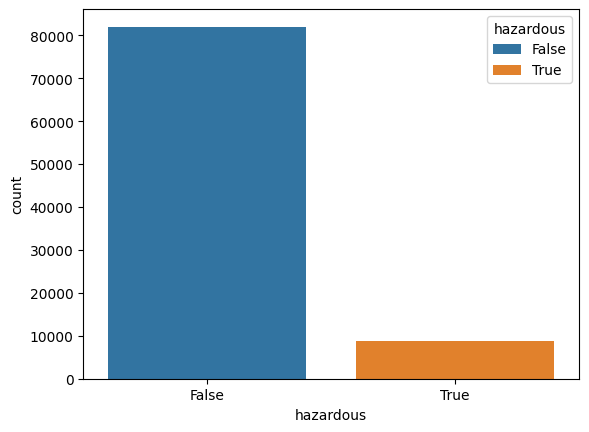

In [8]:
#Gráfico de Barras da classe ('hazardous') - da base original desbalanceada

for col in dados.columns:
    if dados[col].dtype == 'int':
        dados[col] = dados[col].astype(bool)

dados = dados.reset_index(drop=True)
sns.countplot(x='hazardous', data=dados, hue='hazardous')
plt.show()

In [9]:
# Separando as duas classes
dados_false = dados[dados['hazardous'] == False]  # Classe majoritária (False)
dados_true = dados[dados['hazardous'] == True]    # Classe minoritária (True)

# Realizando o undersampling da classe majoritária
dados_false_under = dados_false.sample(n=len(dados_true), random_state=42)  # Subamostra para igualar os True (9000)

#Concatenando a classe minoritária com a subamostra da majoritária
dados_balanceados = pd.concat([dados_false_under, dados_true])

In [11]:
#Verificando se a nova base está balanceada
dados_balanceados.value_counts('hazardous')

,count
hazardous,
False,8840
True,8840


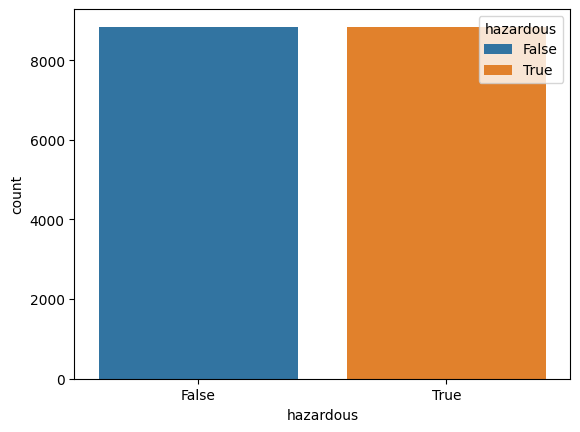

In [12]:
#Gráfico de Barras da classe ('hazardous') - da base original desbalanceada

for col in dados_balanceados.columns:
    if dados_balanceados[col].dtype == 'int':
        dados_balanceados[col] = dados[col].astype(bool)

dados_balancedos = dados_balanceados.reset_index(drop=True)
sns.countplot(x='hazardous', data=dados_balancedos, hue='hazardous')
plt.show()

In [13]:
correlacao = dados_balanceados.corr(method='pearson')

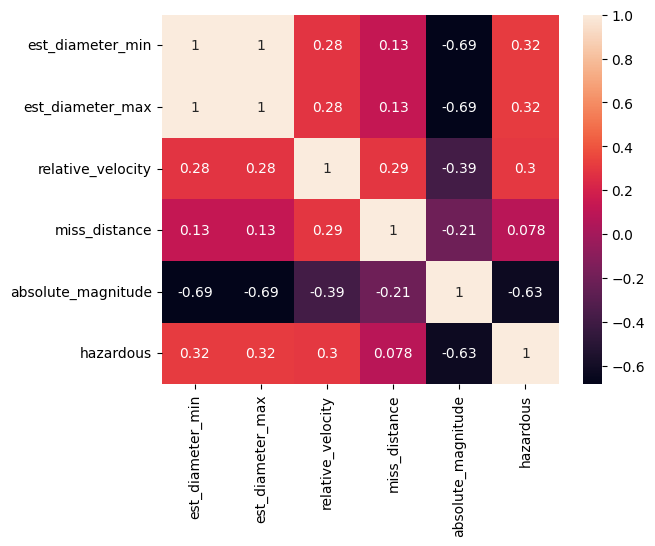

In [14]:
sns.heatmap(correlacao, annot = True);
plt.show()

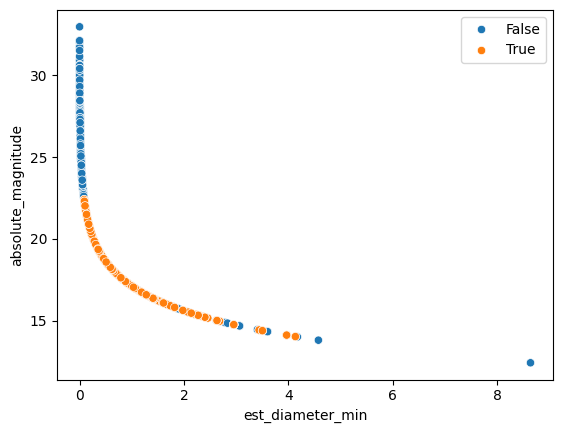

In [15]:
#Scatterplot de corpos com diametro mínimo pela magnitude, com base na periculosidade (harzardous)

#Transformando de volta a classe, que está do tipo inteiro para booleana
for col in dados_balanceados.columns:
    if dados_balanceados[col].dtype == 'int':
        dados_balanceados[col] = dados_balanceados[col].astype(bool)

#Estabelecendo as colunas para a geração gráfica
sns.scatterplot(x=dados_balanceados['est_diameter_min'], y=dados_balanceados['absolute_magnitude'], hue='hazardous',
                data=dados_balanceados)

#Posicionando a legenda na figura
plt.legend(bbox_to_anchor=(1, 1), loc=1)

plt.show()

In [16]:
#ESCALONAMENTO
#Importando as bibliotecas para realizar a padronização
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Usando StandardScaler para padronização
scaler = StandardScaler()

# Aplicando a padronização nas colunas numéricas
dados_scaled = dados_balanceados.copy()
dados_scaled[['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude', 'hazardous']] = scaler.fit_transform(dados_balancedos[['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude', 'hazardous']])

# Exibindo o DataFrame após a padronização
print(dados_scaled)

       est_diameter_min  est_diameter_max  relative_velocity  miss_distance  \
86926         -0.499081         -0.499081           0.190082       0.913214   
765           -0.218458         -0.218458          -1.018191      -0.719434   
27949         -0.659666         -0.659666          -1.157336       1.522015   
83885         -0.582647         -0.582647          -1.114797       0.762045   
66888          0.625738          0.625738           1.993305       0.738706   
...                 ...               ...                ...            ...   
90782         -0.240117         -0.240117           0.477334       0.851014   
90794         -0.337986         -0.337986          -0.126439       0.745157   
90811          0.531588          0.531588          -0.792441       1.542249   
90812          2.867750          2.867750          -0.045191       0.427492   
90818          1.055630          1.055630           0.619399      -1.344241   

       absolute_magnitude  hazardous  
86926       

In [17]:
dados_scaled['hazardous'] = dados_scaled['hazardous'].map({-1.0: False, 1.0: True})
dados_scaled.value_counts('hazardous')

,count
hazardous,
False,8840
True,8840


In [18]:
dados_scaled.head(10000)

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
86926,-0.499081,-0.499081,0.190082,0.913214,0.425709,False
765,-0.218458,-0.218458,-1.018191,-0.719434,-0.244793,False
27949,-0.659666,-0.659666,-1.157336,1.522015,1.660845,False
83885,-0.582647,-0.582647,-1.114797,0.762045,0.838597,False
66888,0.625738,0.625738,1.993305,0.738706,-1.021163,False
...,...,...,...,...,...,...
9333,-0.035404,-0.035404,-0.032645,-0.757153,-0.491820,True
9356,0.217281,0.217281,1.092415,0.308522,-0.738847,True
9360,1.896620,1.896620,0.177069,0.668783,-1.536391,True
9369,0.566084,0.566084,0.055115,-0.496769,-0.985874,True


In [19]:
#Salvando o modelo treinado em pikle
joblib.dump(scaler, 'dadosescalonados.pkl')

['dadosescalonados.pkl']

In [20]:
#Instanciando indicativos X (colunas numéricas) e Y (classe hazardous) para treinamento da IA

X = dados_balancedos.drop(columns=['hazardous']) # Select all columns except 'target' for features
y = dados_balancedos['hazardous'] # Select the 'target' column

# Now you can create your DataFrame
dados_testes = pd.DataFrame(X, columns=X.columns) # Use X.columns to get feature names
dados_testes ['hazardous'] = y
dados_testes.sample(10000)

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
5713,0.063761,0.142574,49827.942343,5.170911e+07,23.10,False
4118,0.421265,0.941976,69157.099615,6.166279e+07,19.00,False
8311,0.022938,0.051291,20290.700302,1.681730e+07,25.32,False
8937,0.231502,0.517654,59517.116241,7.251962e+07,20.30,True
8106,0.007321,0.016370,35063.142812,4.073178e+07,27.80,False
...,...,...,...,...,...,...
17401,0.256186,0.572849,81463.999959,7.099716e+07,20.08,True
14301,0.110804,0.247765,28366.940296,6.066499e+06,21.90,True
2603,0.031956,0.071456,62015.909570,6.703706e+07,24.60,False
11735,0.180532,0.403683,19128.941106,4.164340e+07,20.84,True


In [21]:
#Separando os indicadores para treinar a IA MLP em 90/10 (90% da base balanceada para treinamento e 10% para treino)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
#executando o treinanmento do modelo da IA MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=200, batch_size = 10)
mlp.fit(X_train, y_train)

MLPClassifier(batch_size=10, hidden_layer_sizes=(100, 100))

In [23]:
#estabelecendo novos indicadores para verificação das métricas do modelo treinado
classifiers = [mlp]
classifier_names = ["Rede Neural"]

Resultados para Rede Neural:
              precision    recall  f1-score   support

       False       0.98      0.78      0.87      1776
        True       0.81      0.98      0.89      1760

    accuracy                           0.88      3536
   macro avg       0.90      0.88      0.88      3536
weighted avg       0.90      0.88      0.88      3536



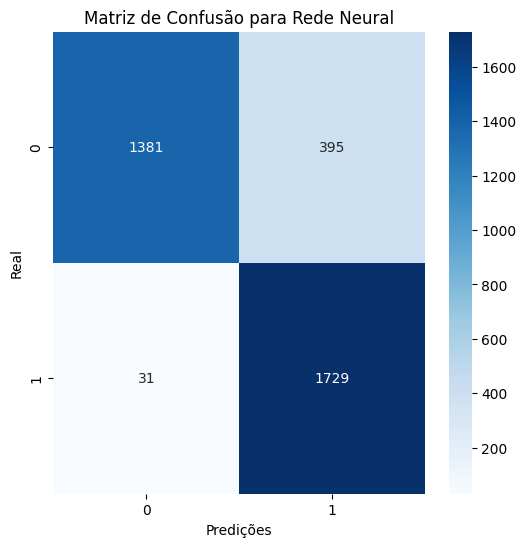

In [24]:
#Verificando as métricas do modelo treinado
for clf, clf_name in zip(classifiers, classifier_names):
    y_pred = clf.predict(X_test)
    print(f"Resultados para {clf_name}:")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot = True, fmt="d", cmap="Blues");
    plt.xlabel('Predições')
    plt.ylabel('Real')
    plt.title(f"Matriz de Confusão para {clf_name}")
    plt.show()

In [25]:
#Salvando o modelo treinado em pikle
joblib.dump(mlp, 'mlp.pkl')

['mlp.pkl']

In [26]:
#Testando uma amostra aleatória
new_sample = np.array([[0.0738847787,0.8204270649, 0.2060819612,
                        0.1010543415,51576.141700413]])
#new_sample = scaler.transform(new_sample)
for clf, clf_name in zip(classifiers, classifier_names):
    prediction = clf.predict(new_sample)
    probability = clf.predict_proba(new_sample).max()
    print(f"Previsão para {clf_name}: Classe {prediction[0]}, Certeza: {probability * 100:.2f}%")

Previsão para Rede Neural: Classe False, Certeza: 100.00%


In [27]:
#Testando a IA, pedindo para ela gerar uma amostra qualquer
new_sample_a = X_test[0]
print(new_sample_a)
print(y_test.iloc[0])

[-0.49997299 -0.49997299 -0.40106648 -0.54282697  0.38692845]
False


In [29]:
#Função para coletar os dados informados pelo usuário
def coleta_dados():
    est_diameter_min = float(input('Informe um diâmetro mínimo: '))
    est_diameter_max = float(input('Informe um diâmetro máximo: '))
    relative_velocity = float(input('Informe uma velocidade estimada entre 500 km/h e 200.000 km/h: '))
    miss_distance = float(input('Informe uma distância entre 12 mil km e 75 milhões km: '))
    absolute_magnitude = float(input('Informe uma magnitude entre 10 e 33: '))

    #converção de dados categóricos
    #hazardous = 0 if hazardous == 'False' else 1

    #separando o conjunto de dados para previsão
    dados_asteroide = [est_diameter_min, est_diameter_max, relative_velocity,	miss_distance,	absolute_magnitude ]  #hazardous
    dados_asteroide = np.array(dados_asteroide)
    dados_asteroide = dados_asteroide.reshape(1, -1)
    dados_asteroide = scaler.transform(dados_asteroide) #escalonando os inputs

    previsao = mlp.predict(dados_asteroide) #jogando no predict
    probability = mlp.predict_proba(dados_asteroide).max()
    print(f"Previsão para {clf_name}: Classe {previsao[0]}, Certeza: {probability * 100:.2f}%")

    if previsao == 0:
      print('O asteroide não é perigoso')
    if previsao == 1:
      print('O asteroide é perigoso')
    else:
      print('Estes são dados hipotéticos e não estão na base de dados.')

coleta_dados()

Informe um diâmetro mínimo: 5.6
Informe um diâmetro máximo: 9
Informe uma velocidade estimada entre 500 km/h e 200.000 km/h: 7
Informe uma distância entre 12 mil km e 75 milhões km: 13000
Informe uma magnitude entre 10 e 33: 15
Previsão para Rede Neural: Classe True, Certeza: 99.58%
O asteroide é perigoso


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
